In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Data Science\\Datasets\\EDA krish\\zomato.csv")

In [3]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

In [10]:
df.shape

(9551, 21)

In [11]:
df_coutry = pd.read_excel('D:\\Data Science\\Datasets\\EDA krish\\Country-Code.xlsx')

In [12]:
df_coutry.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
df_coutry.shape

(15, 2)

In [14]:
final_df =pd.merge(df,df_coutry,on='Country Code',how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [15]:
# to check data type
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [16]:
a = final_df.Country.value_counts()
print(a)

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


In [17]:
b = final_df.Country.value_counts().sum()
print("Total zomato service is",b)

Total zomato service is 9551


In [18]:
def compute_percentage(x,y):
      pct = (x/y * 100)
      print(pct, 2)

In [19]:
compute_percentage(a,b)


India             90.587373
United States      4.544027
United Kingdom     0.837609
Brazil             0.628206
South Africa       0.628206
UAE                0.628206
New Zealand        0.418804
Turkey             0.355984
Australia          0.251283
Phillipines        0.230342
Indonesia          0.219872
Qatar              0.209402
Singapore          0.209402
Sri Lanka          0.209402
Canada             0.041880
Name: Country, dtype: float64 2


In [20]:
country_name = a.index

In [21]:
country_values = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1f6ea5101c0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

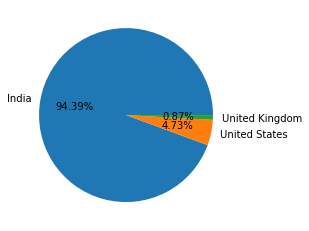

In [22]:
plt.pie(country_values[:3],labels=country_name[:3],autopct="%1.2f%%")

Observation 
1. Most of the transaction happens from India ,USA and UK respectively

In [23]:
## Numerical variables 
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
rating = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [25]:
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Conclusion 
1) Rating for 4.5 to 4.9 --> Excellent 

2) rating for 4.0 to 4.4 --> Very good

3) rating for 3.5 to 3.9 --> Good product

4) rating for 2.5 to 3.4 --> Average product

5) rating for 1.8 to 2.4 --> poor product 

In [26]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

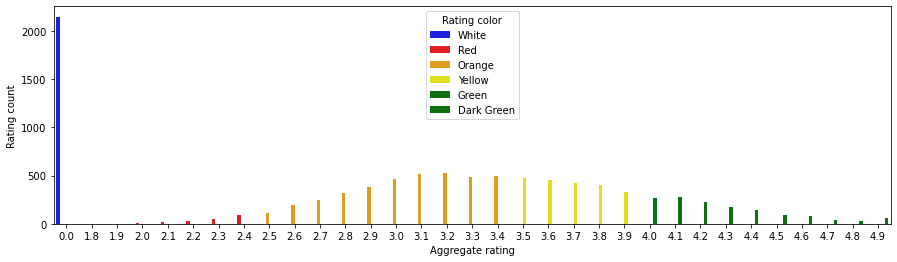

In [27]:
plt.subplots(figsize=(15, 4))
sns.barplot(x='Aggregate rating',y='Rating count',hue = 'Rating color',data=rating,palette=
            ['blue','red','orange','yellow','green','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

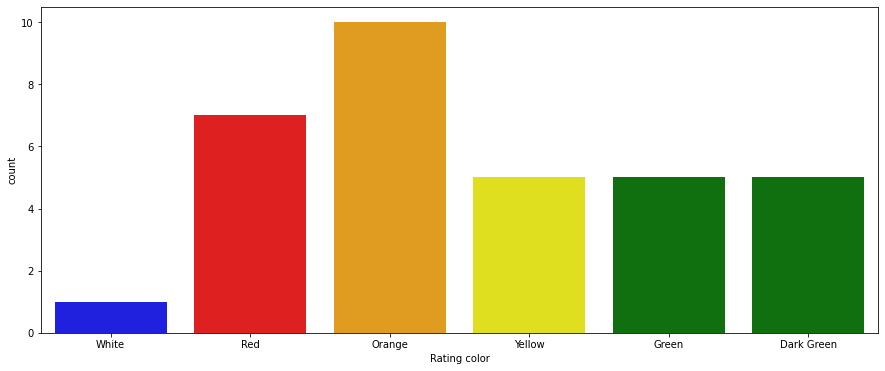

In [28]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Rating color',data=rating,palette= ['blue','red','orange','yellow','green','green'])

Q. Find the countries that  has given 0 rating

In [29]:
group_by_countries = final_df.groupby(['Aggregate rating','Country']).size().reset_index().rename(columns={0:'Rating count'})

In [30]:
group_by_countries.head()

,Aggregate rating,Country,Rating count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [31]:
group_by_countries1 = final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating'})
group_by_countries1.head()

,Country,Rating
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Q2) Find out which currency used by which country ?

In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [33]:
currency_groupby = final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Count'})

In [34]:
currency_groupby

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Q) Which countries do have online delivery option

In [36]:
final_df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
online_service = final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country']).size().reset_index().rename(columns={0:'Count'})

In [38]:
online_service

,Country,Count
0,India,2423
1,UAE,28


In [39]:
online_service1 = final_df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:'Count'})

In [40]:
online_service1

,Country,Has Online delivery,Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


Observations 
1. Online deliveries are available in India and UAE

# Q) Create pie chart for cities distribution 

In [41]:
cities = final_df.City.value_counts()
cities.head(141)

New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Mc Millan           1
Panchkula           1
Tagaytay City       1
Macedon             1
Cochrane            1
Name: City, Length: 141, dtype: int64

In [42]:
city_names = final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x1f6eaf735b0>,
 [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'),
  Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'),
  Text(0.8905335390443715, -0.6457166683903298, 'Noida'),
  Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')],
 [Text(-0.338590892877056, 0.4953344398088204, '69.09%'),
  Text(0.043029951178136655, -0.5984550303085497, '14.11%'),
  Text(0.4857455667514753, -0.35220909184927074, '13.63%'),
  Text(0.597030098843492, -0.05962433290972909, '3.17%')])

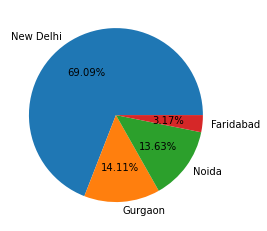

In [43]:
plt.pie(cities[:4],labels=city_names[:4],autopct="%1.2f%%")

Q) Find top 10 cusines 

In [44]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [45]:
top_cusine = final_df[['Cuisines','Votes']].groupby(['Cuisines','Votes']).size().reset_index().rename(columns={0:'Count'})
top_cusine

,Cuisines,Votes,Count
0,Afghani,0,3
1,Afghani,39,1
2,"Afghani, Mughlai, Chinese",2,1
3,"Afghani, North Indian",0,1
4,"Afghani, North Indian, Pakistani, Arabian",3,1
...,...,...,...
6199,"Western, Asian, Cafe",259,1
6200,"Western, Fusion, Fast Food",32,1
6201,World Cuisine,95,1
6202,"World Cuisine, Mexican, Italian",115,1


In [46]:
top_cusine.nunique()

Cuisines    1825
Votes       1012
Count         34
dtype: int64